In [1]:
import numpy as np   
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns     

#funciones específicas de Scikit-learn 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
#para exportar el gráfico como archivo.dot
from sklearn.tree import export_graphviz  

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [2]:
# Funcion que grafica matrix de correlacion
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

In [3]:
#Grafica Roc
def grafica_roc(clf, y_test):
    '''Grafica la curva ROC para el conjunto de prueba'''
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #Area bajo la curva (AUC, por sus siglas en inglés)
    plt.figure()
    plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()


In [4]:
# leer los datos
df = pd.read_csv('C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\ArbolesDecision-RandomForests\\ClasificadorClientesTelecom-master\\Datos\\Loan Prection.csv')

df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
# Info para conocer el tipo de dato en cada columna
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Seteamos el LOAN_ID como index
df = df.set_index('Loan_ID')

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#Chequeamos valores nulos
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Drop NaN Values
df = df.dropna()
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Revisamos las categorías y frecuencias de cada variable de tipo "objeto"

df_obj = df.select_dtypes("object")  

for col in df_obj.columns:
    print (col)
    print (df[col].value_counts(),'\n')

Gender
Male      394
Female     86
Name: Gender, dtype: int64 

Married
Yes    311
No     169
Name: Married, dtype: int64 

Dependents
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64 

Education
Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

Self_Employed
No     414
Yes     66
Name: Self_Employed, dtype: int64 

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64 

Loan_Status
Y    332
N    148
Name: Loan_Status, dtype: int64 



In [10]:
yes_no_columns = [
                  'Married',
                  'Self_Employed',                
                  ]

for i in yes_no_columns:
    df[i].replace(to_replace='Yes', 
                  value=1, inplace=True)
    df[i].replace(to_replace='No', 
                  value=0, inplace=True)

Y_N_column = ['Loan_Status']

for i in Y_N_column:
    df[i].replace(to_replace='Y', 
                  value=1, inplace=True)
    df[i].replace(to_replace='N', 
                  value=0, inplace=True)
                  
df.head(3)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1


In [11]:
print(df.shape)
print(df.columns)
#Utilizamos one-hot encoding para convertir variables categoricos a binarias (con ceros y unos)
df = pd.get_dummies(df)
print(df.shape, '\n', df.columns)

(480, 12)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
(480, 19) 
 Index(['Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


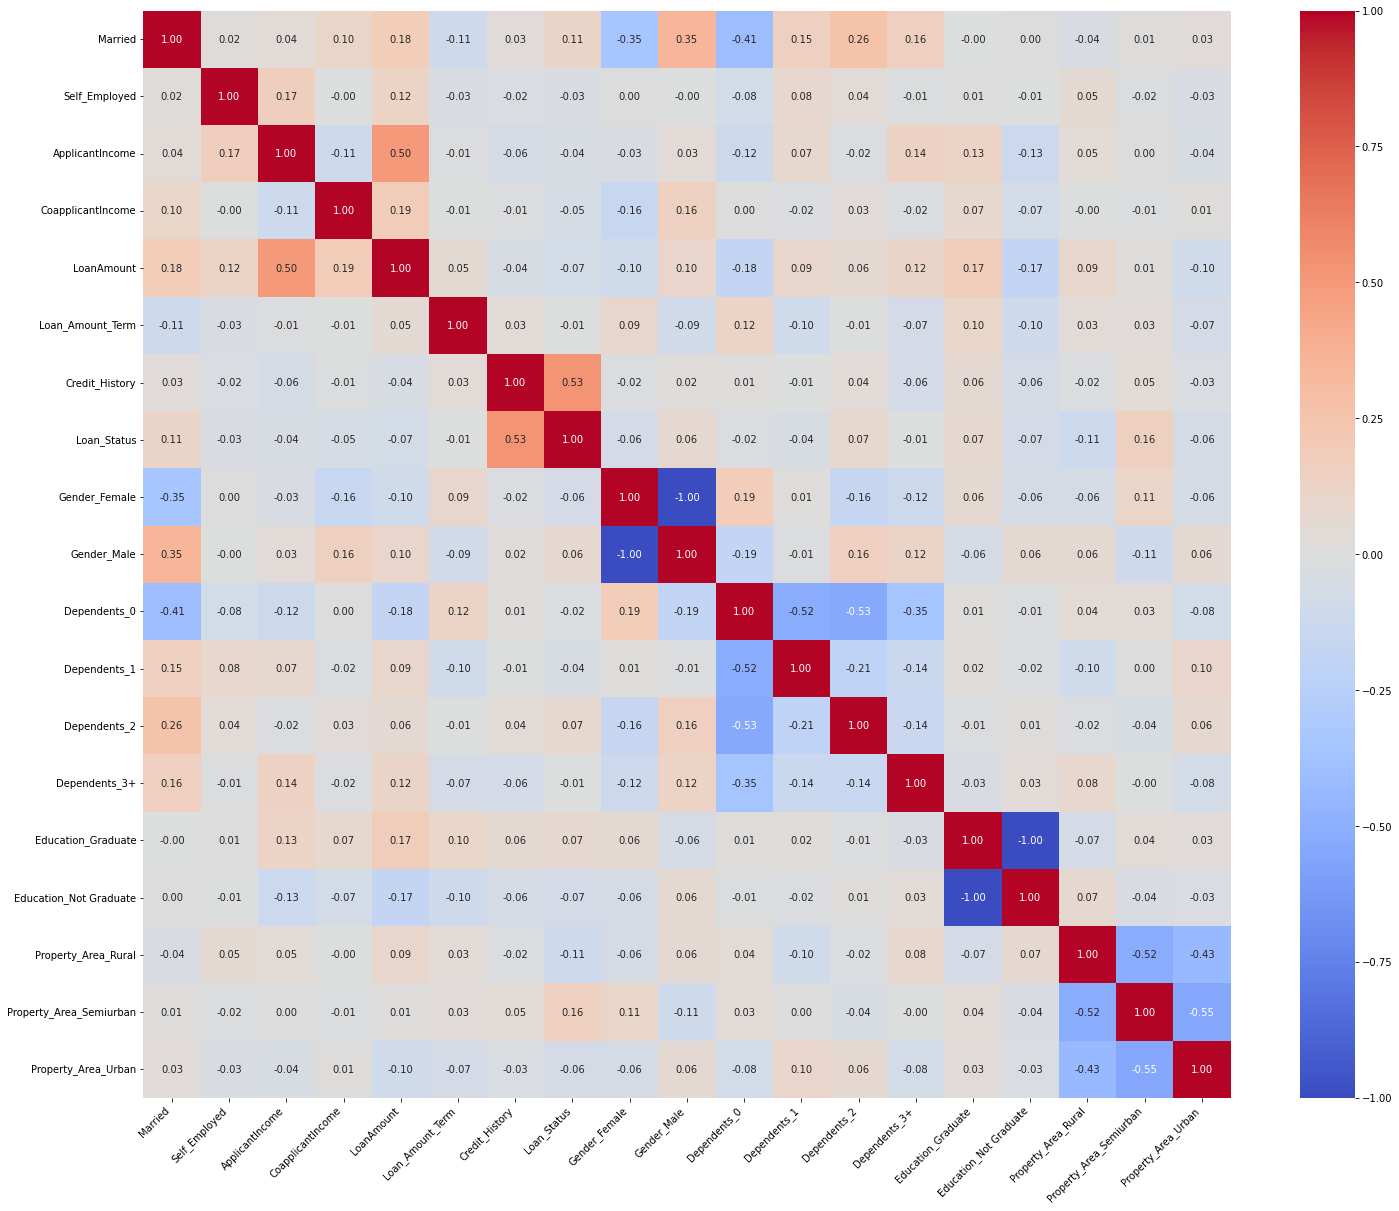

In [12]:
#Detectar variables redundantes 

corr_matrix = correlacion(df, grafica=True, matrix=True)

In [13]:
#Identificar variables redundantes 

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
borrar = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] == 1)]
borrar

['Gender_Male']

In [14]:
#eliminar columnas en la lista borrar
df = df.drop(columns = borrar)

#renombrar columna (recordar que 0 sera Male y 1 Female)
df = df.rename(columns = {"Gender_Female":"Gender"})  

In [15]:
df.columns

Index(['Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [16]:
#Llevar columna de clase (Loan_Status) hasta la última posición

cols = df.columns.tolist()

df = df[[c for c in df if c != 'Loan_Status'] + ['Loan_Status']]

print(df.shape)

df.head()

(480, 18)


,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001003,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,1,0,0,0
LP001005,1,1,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,1,0,0,0,1,1
LP001006,1,0,2583,2358.0,120.0,360.0,1.0,0,1,0,0,0,0,1,0,0,1,1
LP001008,0,0,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,1,0,0,0,1,1
LP001011,1,1,5417,4196.0,267.0,360.0,1.0,0,0,0,1,0,1,0,0,0,1,1


In [17]:
print('Número de columnas: ', df.shape[1], '\n') 
print('Número de valores en cada columna: ')
df.nunique()

Número de columnas:  18 

Número de valores en cada columna: 


Married                      2
Self_Employed                2
ApplicantIncome            405
CoapplicantIncome          232
LoanAmount                 186
Loan_Amount_Term             9
Credit_History               2
Gender                       2
Dependents_0                 2
Dependents_1                 2
Dependents_2                 2
Dependents_3+                2
Education_Graduate           2
Education_Not Graduate       2
Property_Area_Rural          2
Property_Area_Semiurban      2
Property_Area_Urban          2
Loan_Status                  2
dtype: int64

<AxesSubplot:>

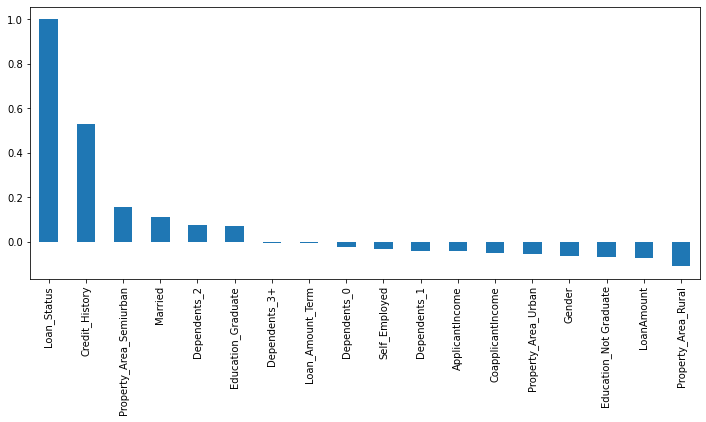

In [18]:
#Correlación de cada variable con Churn
plt.figure(figsize = (12,5))
df.corr()['Loan_Status'].sort_values(ascending = False).plot(kind ='bar',)

In [19]:
#Separar las etiquetas del conjunto de datos

Y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=261)

In [21]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("Z: ", Y_train.shape)
print('Loan_Status_Y:{:7.3f}%'.format(Y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("Z: ", Y_test.shape)
print('Loan_Status_Y:{:7.3f}%'.format(Y_test.mean()*100))

TRAINING SET
X:  (336, 17)
Z:  (336,)
Loan_Status_Y: 71.131% 

TEST SET
X:  (144, 17)
Z:  (144,)
Loan_Status_Y: 64.583%


In [22]:
profundidad = 2

#Entrenamiento del modelo
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy", 
                                      random_state=0)
clasificador.fit(X_train, Y_train)

print("La profundida del árbol es: {}".format(clasificador.get_depth()))                          

#Predicción y evaluación sobre el conjunto de entrenamiento
Z_pred_train = clasificador.predict(X_train)
precision_train = accuracy_score(Y_train, Z_pred_train)*100
print("Precisión conjunto de entrenamiento: {:4.2f}%".format(precision_train))

#Predicción y evaluación sobre el conjunto de prueba
Z_pred_test = clasificador.predict(X_test)
precision_test = accuracy_score(Y_test, Z_pred_test)*100
print("Precisión conjunto de prueba: {:4.2f}%".format(precision_test),'\n')

La profundida del árbol es: 2
Precisión conjunto de entrenamiento: 82.44%
Precisión conjunto de prueba: 78.47% 



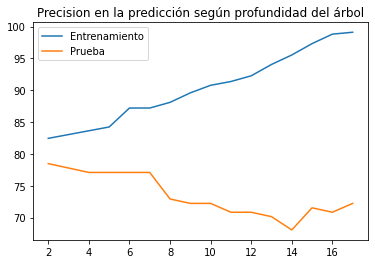

In [23]:
clf = {}
Y_pred_train = {}
Y_pred_test = {}
precision_train={}
precision_test = {}

for p in range(2,18):
  #Entrenamiento del modelo
  clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", 
                               random_state = 0).fit(X_train, Y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
  Y_pred_train[p] = clf[p].predict(X_train)
  precision_train[p] = accuracy_score(Y_train, Y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
  Y_pred_test[p] = clf[p].predict(X_test)
  precision_test[p] = accuracy_score(Y_test, Y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

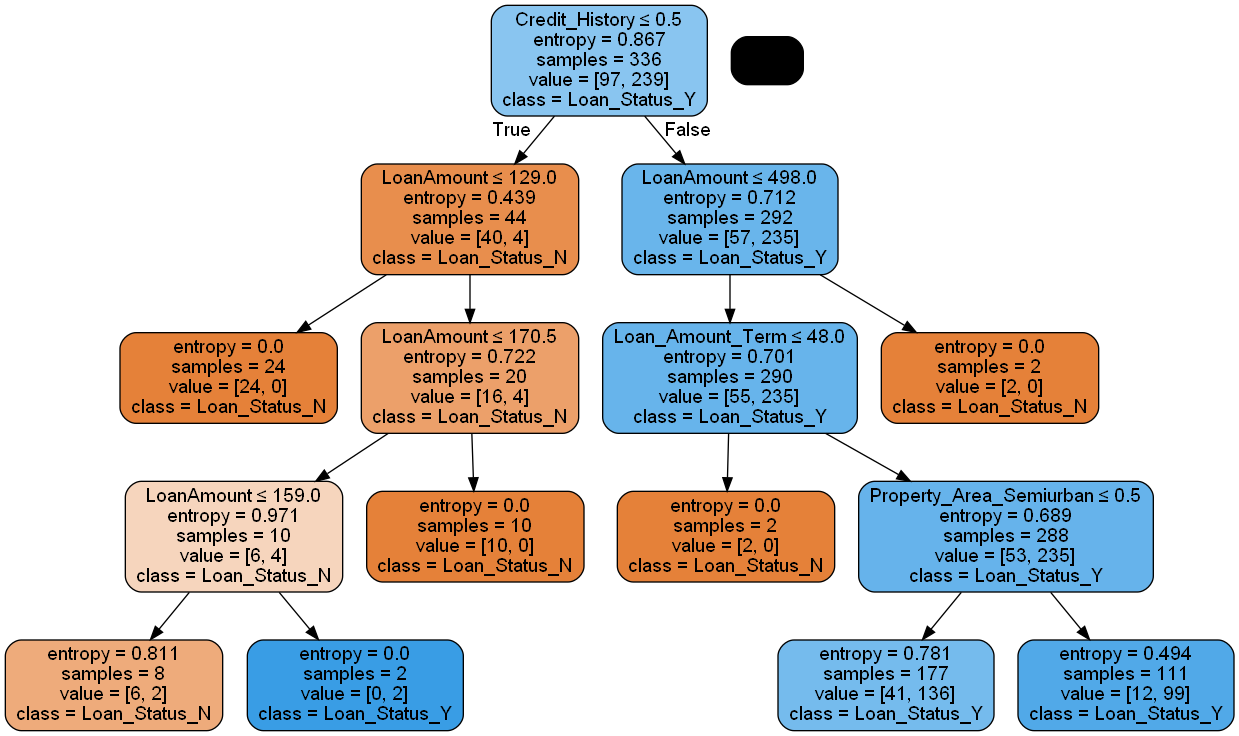

In [24]:
#Método 1 para graficar el arbol exportando el arbol como un archivo .dot

dot_data = export_graphviz(clf[4], rounded = True, 
                           filled = True, 
                           special_characters = True, 
                           feature_names = X.columns,
                           max_depth = 4,
                           class_names = ['Loan_Status_N','Loan_Status_Y'])

graph = graph_from_dot_data(dot_data)

Image(graph.create_png( ))

In [25]:
clf[4].feature_importances_.sum()

1.0000000000000002

<AxesSubplot:>

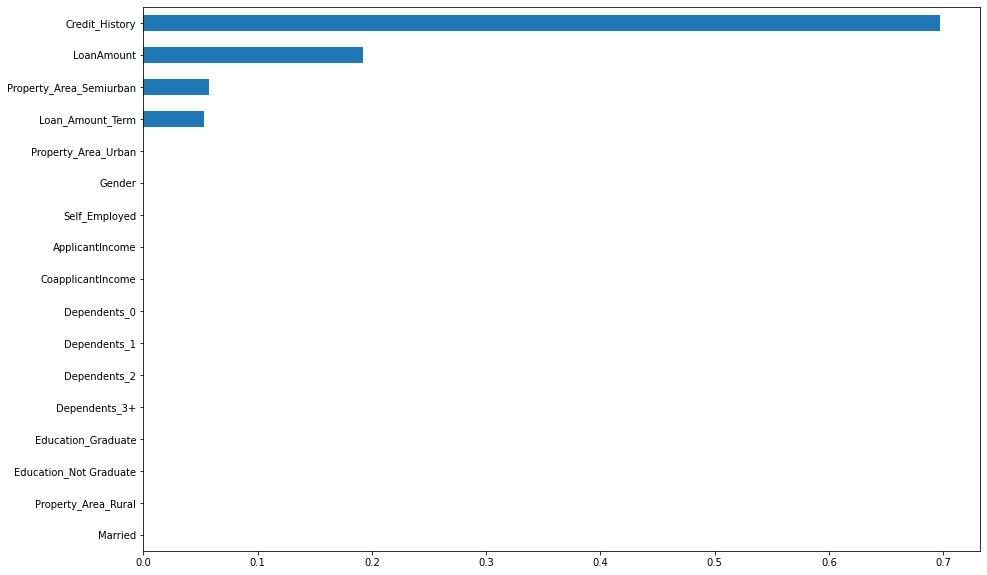

In [26]:
weights = pd.Series(clf[4].feature_importances_,
                    index=X.columns.values)

weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

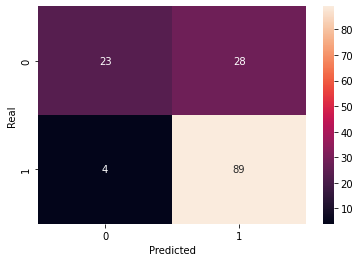

In [27]:
#Matriz de confusión

import seaborn as sns

data = {'Y_Real':  Y_test,
        'Y_Prediccion': Y_pred_test[3]
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

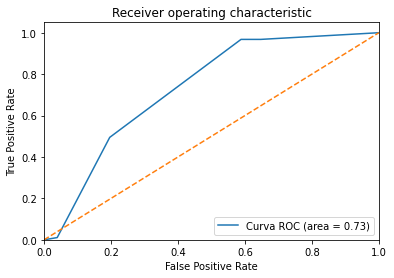

In [28]:
grafica_roc(clf[4], Y_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0, 
                                criterion='entropy').fit(X_train, Y_train)


Y_pred = clf_rf.predict(X_test)
print("Precisión del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(Y_test, Y_pred)*100))

Precisión del modelo Bosque Aleatorio en el conjunto de prueba: 77.08%


<AxesSubplot:>

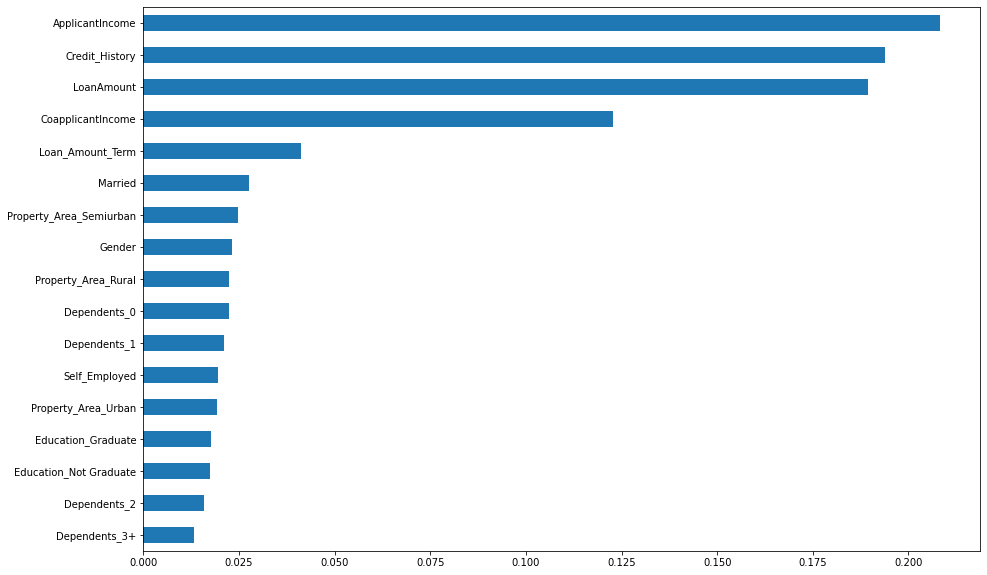

In [31]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(15, 10))

In [32]:
weights.sum()

1.0